# Modelando la Pandemia

  En este proyecto vamos a estudiar y analizar los datos mundiales de la pandemia COVID-19 usando países modelo de distintas políticas públicas para luego interpretar otras curvas.

Puedes descargar el dataset de casos totales, divididos por país [aquí.](
https://ourworldindata.org/coronavirus-data?country=
) Descarga los datos  formato .csv luego podrás cargarlos en el notebook usando pandas, a partir de eso selecciona los de los países que te interesan, hay un ejemplo de cómo se hace esto en este notebook. 

# ¿Cómo empezó la pandemia?


  La primer parte del trabajo consiste en estudiar cómo se empieza a propagar la pandemia, luego analizaremos las medidas tomadas y su efectividad.

  Al inicio de una pandemia, se estima que los contagios siguen una ley exponencial, esa es la fase de "crecimiento exponencial", luego hay un decaimiento dado por la inmunidad. 

  Los datos de casos confirmados en función del tiempo $C(t)$, pueden aproximarse con el modelo

$C(t)=e^{k(t-t_0)}$

donde $t_0$ es la fecha del primer contagio, y $k$ es un parámetro propio de cada enfermedad, que habla de la contagiosidad. Cuanto mayor es $k$, más grande será el número de casos confirmados dado por la expresión. $k$ depende de el tiempo que una persona enferma contagia, el nivel de infecciosidad del virus y cuántas personas que se pueden contagiar ve una persona enferma por día. Es decir, la circulación. Haciendo cuarententa, $k$ disminuye, con la circulación $k$ aumenta.

  El parámetro $k$ está directamente relacionado con el $R$ del que tanto se habla en los medios. En este proyecto haremos foco en $k$, pero puedes profundizar sobre esto si quieres, empezandó por [aquí](https://es.wikipedia.org/wiki/Ritmo_reproductivo_b%C3%A1sico). 

  Es posible hacer un modelo completo, pero para eso es necesario utilizar ecuaciones diferenciales. Si quieres profundizar sobre eso, busca información sobre "modelo epidemiológico SEIR". Si quieres ver cómo funciona este modelo, puedes empezar por [aquí](http://gabgoh.github.io/COVID/index.html). En ese link está implementado el modelo SEIR (no es necesario entender las ecuaciones en este caso) y el rol que cumplen los parámetros, puedes explorar el impacto de variar $R$ y el resto de los valores para ver cómo impactan en la cirva de contagios. Ahora utilizaremos la siguiente expresión para describir únicamente la etapa de crecimiento exponencial.


  Comienza estudiando cómo se distribuyó el $k$ inicial de la pandemia y si es posible elaborar un intervalo de confianza razonable para este valor. Para eso 
  
  1. Elegir diez países del norte (ahí empezó la pandemia) y puedes mide el valor de $k$ inicial de la pandemia, analizando datos del primer tramo.

  2. Analiza si es posible estimar la evolución mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para $k$ a partir de los que obtuviste y así generar un modelo nuevo, basado en la distribución de $k$. Luego compara el modelo con los datos mundiales.

3. Piensa qué significa que el modelo de "bien" o dé "mal" ¿qué indicadores de esto existen?. Luego discute en el informe por qué crees que dio así. Recuerda que es importante elegir bien la población de muestra. Piensa qué criterios puedes elegir para representar bien la población mundial que se contagió al inicio de la pandemia.
 
 # Evaluando estrategias

 Ahora que tienes una manera de obtener información de las curvas, puedes intentar evaluar las estrategias de acción y el comportamiento de las poblaciones, construyendo un clasificador binario. 
1. Elige una categoría binaria que hable de políticas públicas elegidas por los países para enfrentar la pandemia que te interese estudiar, como pueden ser "la población hizo cuarententa" o "la población se vacunó".
2. Piensa qué indicadores de la curva pueden hablar del éxito de la política que quieres estudiar. Por ejemplo, si se tratase de evaluar el éxito de una cuarentena podría ser porcentaje de población  que se contagió o variación del valor de $k$ a partir de que se empezó a implementar esa medida. Elige al menos 3 indicadores.
3. Investiga sobre países que hayan aplicado o no esa política pública, para generar una base de datos. Por ejemplo, Brasil no hizo cuarentena y China hizo una muy estricta. Recuerda hacer una selección inteligente de la porción de datos de la curva de cada país que vas a analizar.
4. Construye un clasificador binario a partir de una regresión logística o usando Naive Bayes para intentar analizar la estrategia de otros países y ver si es posible predecirla a partir de la curva de contagios y el clasificador. Un posible clasificador binario es uno que clasifique el porcentaje de contagios en función da las categorías "la población hizo cuarentena" y "la población n hizo cuarentena". Haz esto para los 3 indicadores que elegiste en el punto 3 y compara los resultados.
5. Elabora un informe con lo que hayas aprendido a lo largo de este proyecto, donde discutas la utilidad o no de los indicadores que elegiste y del análisis estadístico propuesto.

#¡Comencemos!

  A continuación dejamos un ejemplo de cómo extraer el $k$ inicial de Argentina, usando un ajuste de cuadrados mínimos. Si necesitas los datos mundiales, en la columna de países aparecen como "World".



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as plt
from scipy.optimize import curve_fit
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV

In [2]:
#Seteamos para que no utilice notacion cientifica
pd.options.display.float_format = '{:,.4f}'.format
#Seteo para que el máximo de columnas que muestra al levantar una base sean 500
pd.set_option('display.max_columns',500)
#Estos códigos hacen que la visualización de la consola abarque toda la pantalla (sin los recortes a los costados). Tambien hacen que al mostrar dataframes podamos ver todas las columnas que tiene.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
#cargamos los datos

#drive.mount('/content/gdrive', force_remount=True)

# Aca deben apuntar a la carpeta de su drive donde guardaron los datos
#root_dir = "/content/gdrive/My Drive/datos_acamica"
#datos=pd.read_csv('/content/gdrive/My Drive/datos_acamica/datos_covid.csv')
#datos

In [3]:
ruta=r'C:\Users\JuanPabloEspinosaCas\OneDrive - Pactia\PACTIA - Operaciones\Python\Curso DataScience\Entregas\Datasets\\'
datos= pd.read_csv(ruta +'owid-covid-data.csv', sep =',')
datos_mundo= pd.read_csv(ruta +'owid-covid-data (world).csv', sep =',')

In [4]:
datos.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0000,5.0000,NaN,NaN,NaN,NaN,0.1260,0.1260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3300,"39,835,428.0000",54.4220,18.6000,2.5810,1.3370,"1,803.9870",NaN,597.0290,9.5900,NaN,NaN,37.7460,0.5000,64.8300,0.5110,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0000,0.0000,NaN,NaN,NaN,NaN,0.1260,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3300,"39,835,428.0000",54.4220,18.6000,2.5810,1.3370,"1,803.9870",NaN,597.0290,9.5900,NaN,NaN,37.7460,0.5000,64.8300,0.5110,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0000,0.0000,NaN,NaN,NaN,NaN,0.1260,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3300,"39,835,428.0000",54.4220,18.6000,2.5810,1.3370,"1,803.9870",NaN,597.0290,9.5900,NaN,NaN,37.7460,0.5000,64.8300,0.5110,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0000,0.0000,NaN,NaN,NaN,NaN,0.1260,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3300,"39,835,428.0000",54.4220,18.6000,2.5810,1.3370,"1,803.9870",NaN,597.0290,9.5900,NaN,NaN,37.7460,0.5000,64.8300,0.5110,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0000,0.0000,NaN,NaN,NaN,NaN,0.1260,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3300,"39,835,428.0000",54.4220,18.6000,2.5810,1.3370,"1,803.9870",NaN,597.0290,9.5900,NaN,NaN,37.7460,0.5000,64.8300,0.5110,NaN,NaN,NaN,NaN


In [5]:
countries=['Austria','Belgium','Canada','Sweden','Croatia','Denmark','Germany','Italy','Netherlands','France']

In [6]:
paises=datos['location'] #cargo el vector de paises
confirmados=datos['total_cases_per_million'] #carga vector todos los casos confirmados

Text(0, 0.5, 'cantidad de casos / por millon')

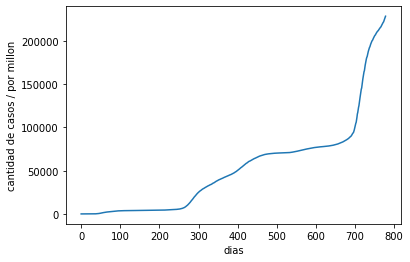

In [7]:
#seleccionamos Italia

ind_1=np.where(paises=='Italy')
ind_1=ind_1[0]
casos_1=confirmados[ind_1]
dias=np.arange(0,len(casos_1))
plt.plot(dias,casos_1)
plt.xlabel('dias')
plt.ylabel('cantidad de casos / por millon')

Esta es la curva de **casos totales** de Italia.

Para ver mejor la curva, podemos tomar el logartimo de los datos. Una curva exponencial se ve lineal en escala logarítmica


Text(0, 0.5, 'log cantidad de casos')

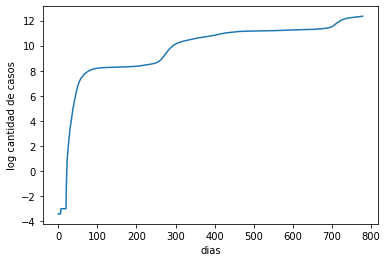

In [8]:
plt.plot(dias,np.log(casos_1))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Veamos lo que pasa en los primeros 70 días desde que se detectó el primer caso en Belgica, para ver cómo fue el $k$ inicial

Text(0, 0.5, 'cantidad de casos')

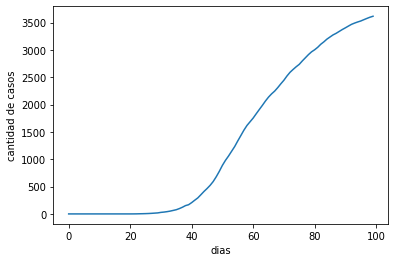

In [9]:
casos_principio=casos_1[0:100]
dias_principio=dias[0:100]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Es difícil determinar si esta parte es exponencial. Analicemos qué pasa en escala logarítmica.

Text(0, 0.5, 'log cantidad de casos')

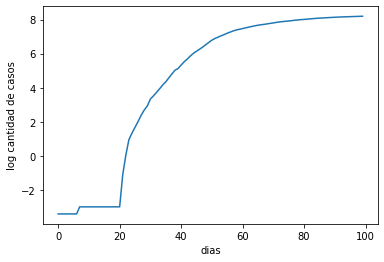

In [10]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Mejor nos quedamos con lo que sucede entre los días 25 y 50, ya que ese fue el comportamiento más sostenido.

Text(0, 0.5, 'cantidad de casos')

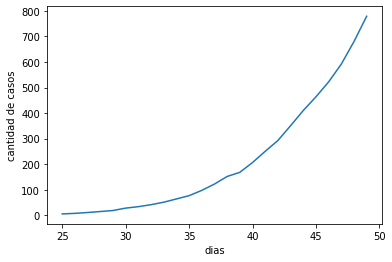

In [11]:
casos_principio=casos_1[25:50]
dias_principio=dias[25:50]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

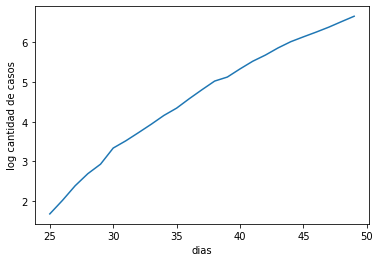

In [12]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

¡Se ve bastante lineal! Aprovechemos esto para averiguar el $k$ utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$



In [13]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
    C=np.exp(k*(t-t0))
    return C

In [14]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
popt

array([0.15220988, 5.03562337])

In [15]:
pcov

array([[1.31538877e-05, 3.55753923e-03],
       [3.55753923e-03, 9.68058993e-01]])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

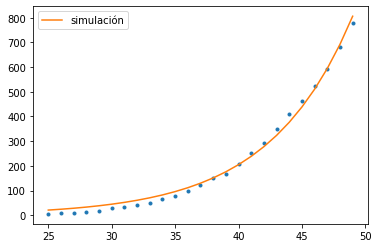

In [16]:
k=popt[0]
t0=popt[1]
casos_simu_1=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu_1, label="simulación")
plt.legend()

In [17]:
def casos_nuevos(casos):
    nuevos=np.zeros(len(casos))
    i=0
    while i<len(nuevos)-1:
        nuevos[i]=casos[i+1]-casos[i]
        i=i+1

    return nuevos   

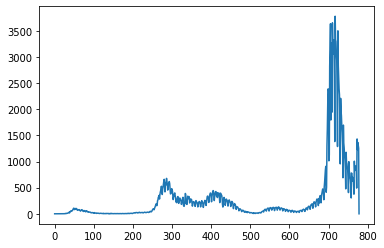

In [18]:
casos_1=np.array(casos_1)
nuevos_1=casos_nuevos(casos_1)
plt.plot(nuevos_1)

compara el modelo con los datos de distintos paises:

In [19]:
filtro=datos['location'].isin(['Austria','Belgium','Canada','Sweden','Croatia','Denmark','Germany','Italy','Netherlands','France'])
datos_10=datos[filtro]

In [20]:
datos_10.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
9860,AUT,Europe,Austria,2020-02-25,2.0000,2.0000,NaN,NaN,NaN,NaN,0.2210,0.2210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.1100,"9,043,072.0000",106.7490,44.4000,19.2020,13.7480,"45,436.6860",0.7000,145.1830,6.3500,28.4000,30.9000,NaN,7.3700,81.5400,0.9220,NaN,NaN,NaN,NaN
9861,AUT,Europe,Austria,2020-02-26,2.0000,0.0000,NaN,NaN,NaN,NaN,0.2210,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.1100,"9,043,072.0000",106.7490,44.4000,19.2020,13.7480,"45,436.6860",0.7000,145.1830,6.3500,28.4000,30.9000,NaN,7.3700,81.5400,0.9220,NaN,NaN,NaN,NaN
9862,AUT,Europe,Austria,2020-02-27,3.0000,1.0000,NaN,NaN,NaN,NaN,0.3320,0.1110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.1100,"9,043,072.0000",106.7490,44.4000,19.2020,13.7480,"45,436.6860",0.7000,145.1830,6.3500,28.4000,30.9000,NaN,7.3700,81.5400,0.9220,NaN,NaN,NaN,NaN
9863,AUT,Europe,Austria,2020-02-28,3.0000,0.0000,NaN,NaN,NaN,NaN,0.3320,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.1100,"9,043,072.0000",106.7490,44.4000,19.2020,13.7480,"45,436.6860",0.7000,145.1830,6.3500,28.4000,30.9000,NaN,7.3700,81.5400,0.9220,NaN,NaN,NaN,NaN
9864,AUT,Europe,Austria,2020-02-29,9.0000,6.0000,NaN,NaN,NaN,NaN,0.9950,0.6630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.1100,"9,043,072.0000",106.7490,44.4000,19.2020,13.7480,"45,436.6860",0.7000,145.1830,6.3500,28.4000,30.9000,NaN,7.3700,81.5400,0.9220,NaN,NaN,NaN,NaN


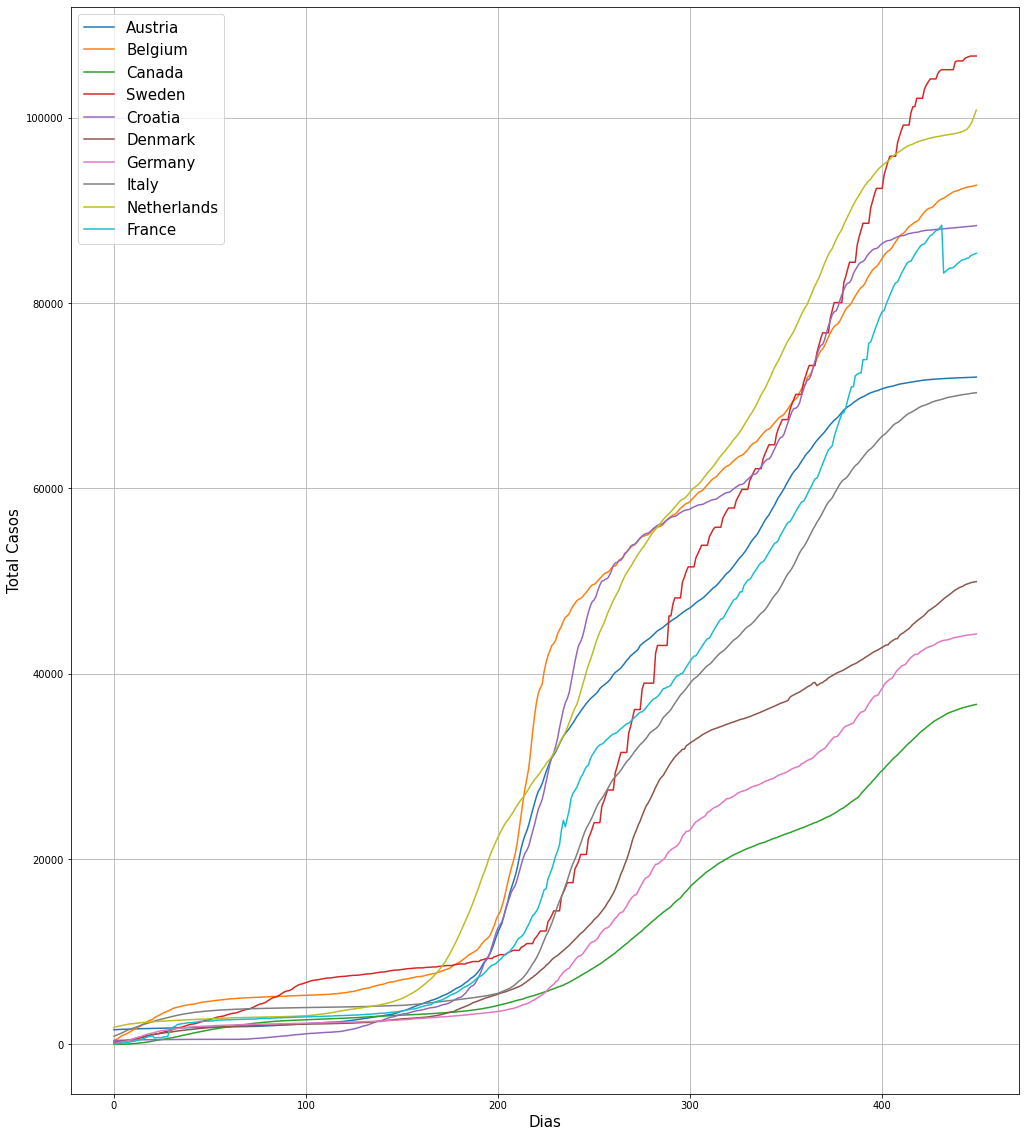

In [21]:
fig=plt.figure(figsize=(17,20))
for country in countries:
    casos = datos_10['total_cases_per_million'][(datos_10.location == country)][50:500]
    dias = np.arange(casos.shape[0])
    plt.plot(dias,casos,label = country)

plt.rc('axes', labelsize =10)
#plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Total Casos', fontsize = 15)
plt.xlabel('Dias', fontsize = 15)
plt.grid()
plt.show()

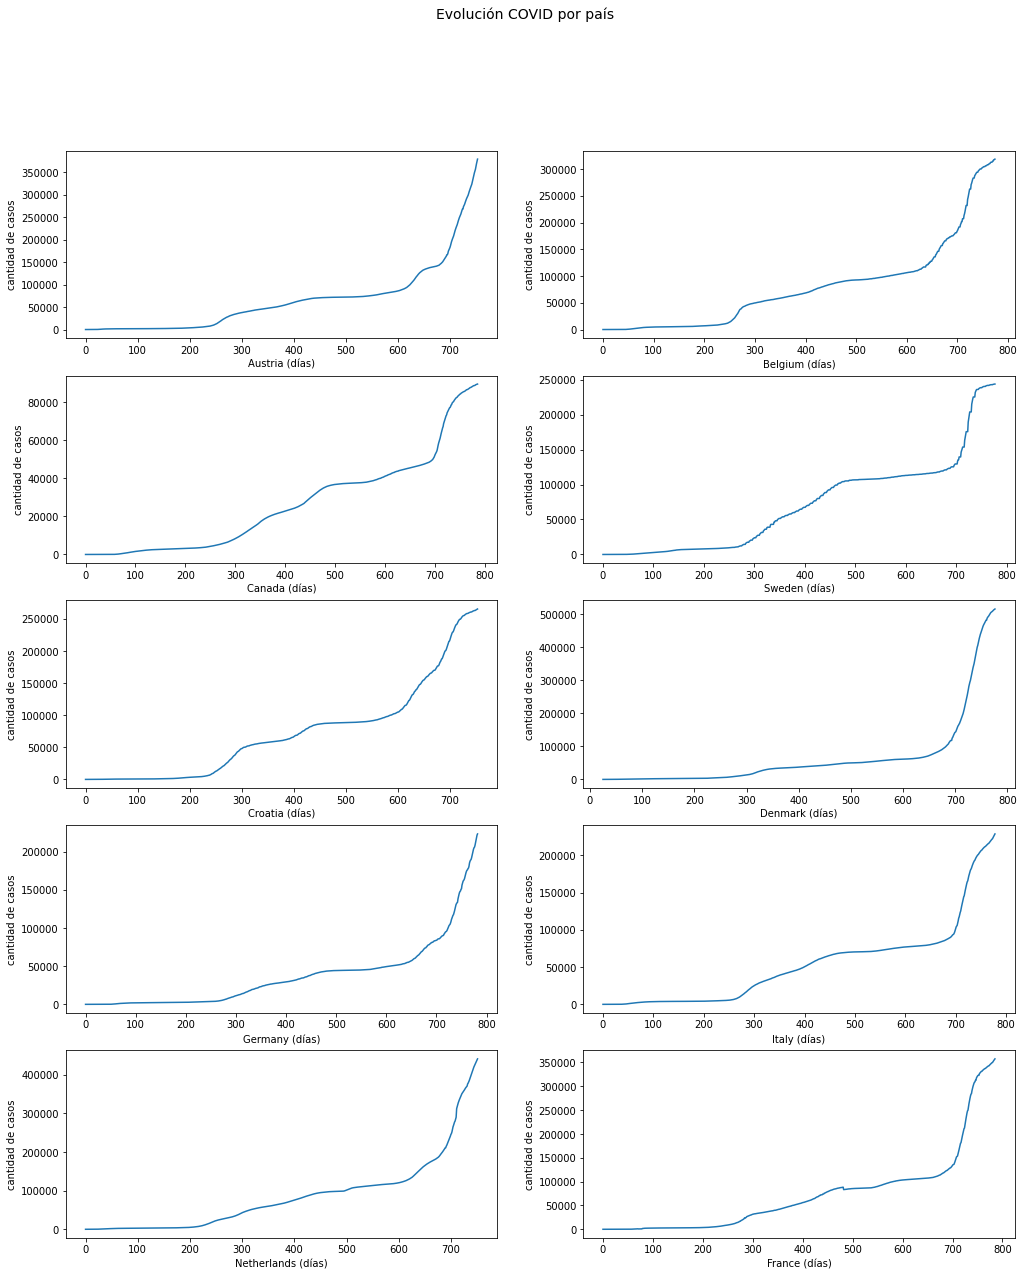

In [22]:
fig=plt.figure(figsize=(17,20))
for i in np.arange(0,10):
    plt.subplot(5,2,i+1)
    ind=np.where(paises==countries[i])
    ind=ind[0]
    casos=confirmados[ind]
    dias=np.arange(0,len(casos))
    plt.plot(dias,casos)
    fig.suptitle('Evolución COVID por país', fontsize=14)
    plt.xlabel(countries[i]+" (días)")
    plt.ylabel('cantidad de casos')


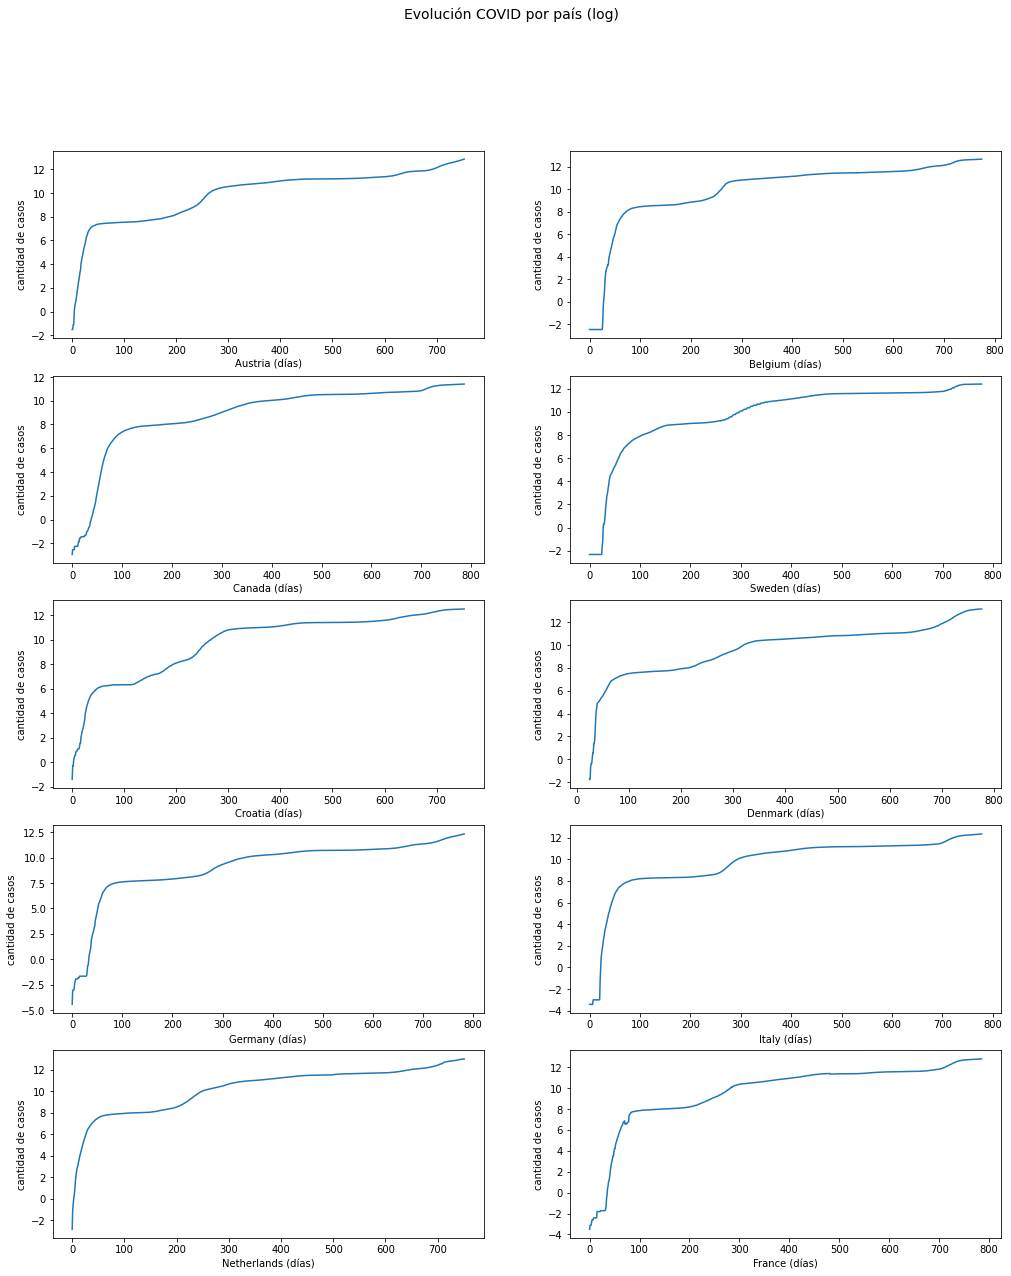

In [24]:
fig=plt.figure(figsize=(17,20))
for i in np.arange(0,10):
    plt.subplot(5,2,i+1)
    ind=np.where(paises==countries[i])
    ind=ind[0]
    casos=confirmados[ind]
    dias=np.arange(0,len(casos))
    plt.plot(dias,np.log(casos))
    fig.suptitle('Evolución COVID por país (log)', fontsize=14)
    plt.xlabel(countries[i]+" (días)")
    plt.ylabel('cantidad de casos')
    

Teniendo estas graficas haremos un zoom adicional para encontrar los comportamienteos iniciales que se presentaron en cada uno de los paises y encontrar un k de crecimiento de acuerdo a la primero ola de contagios del la pandemia

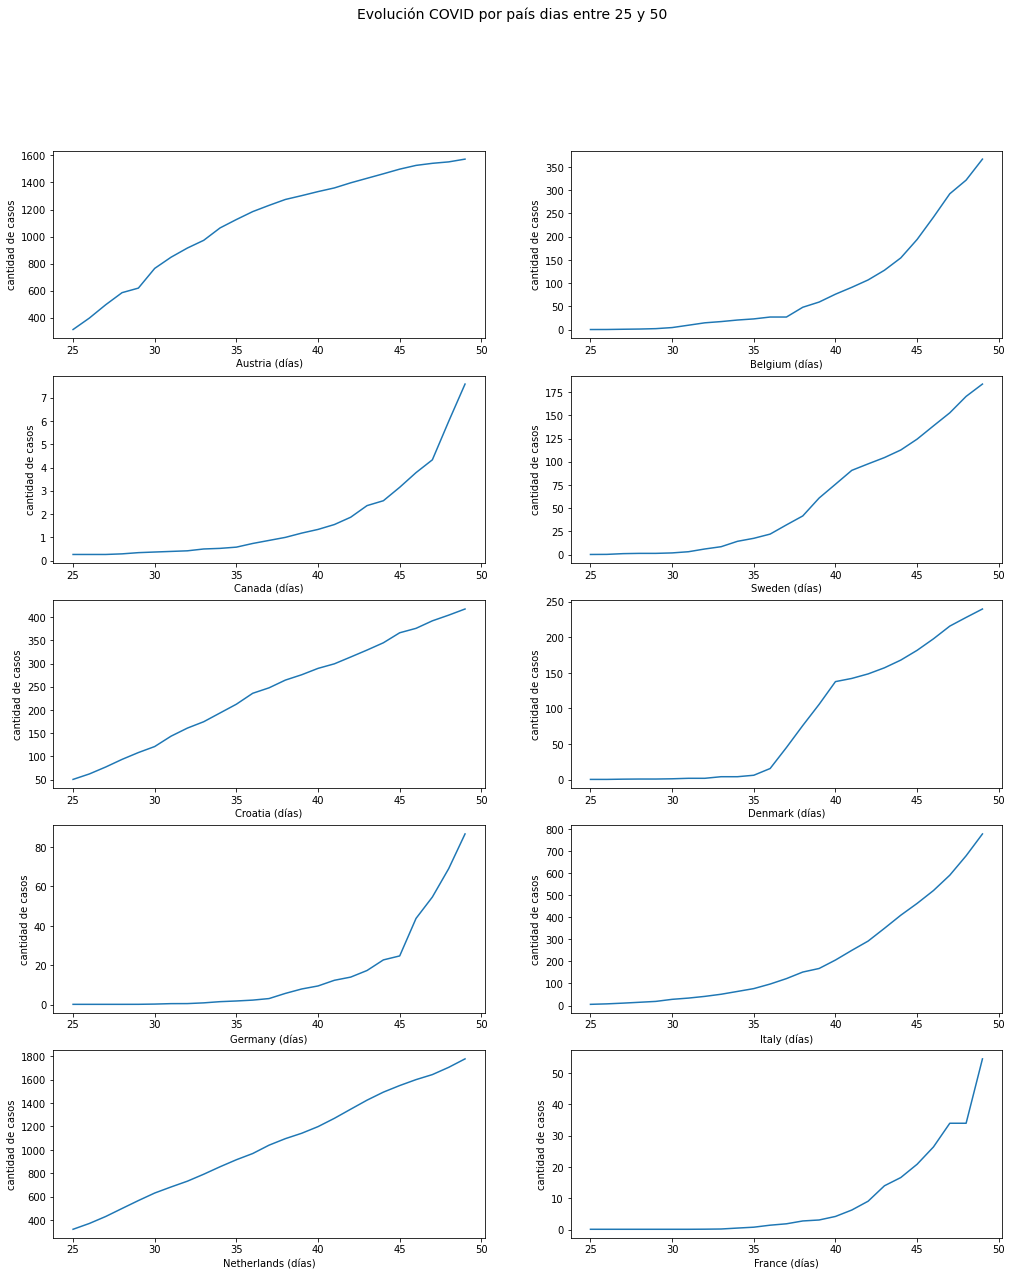

In [25]:
fig=plt.figure(figsize=(17,20))
for i in np.arange(0,10):
    plt.subplot(5,2,i+1)
    ind=np.where(paises==countries[i])
    ind=ind[0]
    casos=confirmados[ind]
    dias=np.arange(0,len(casos))
    
    casos_principio=casos[25:50]
    dias_principio=dias[25:50]
    plt.plot(dias_principio,casos_principio)
    fig.suptitle('Evolución COVID por país dias entre 25 y 50', fontsize=14)
    plt.xlabel(countries[i]+" (días)")
    plt.ylabel('cantidad de casos')

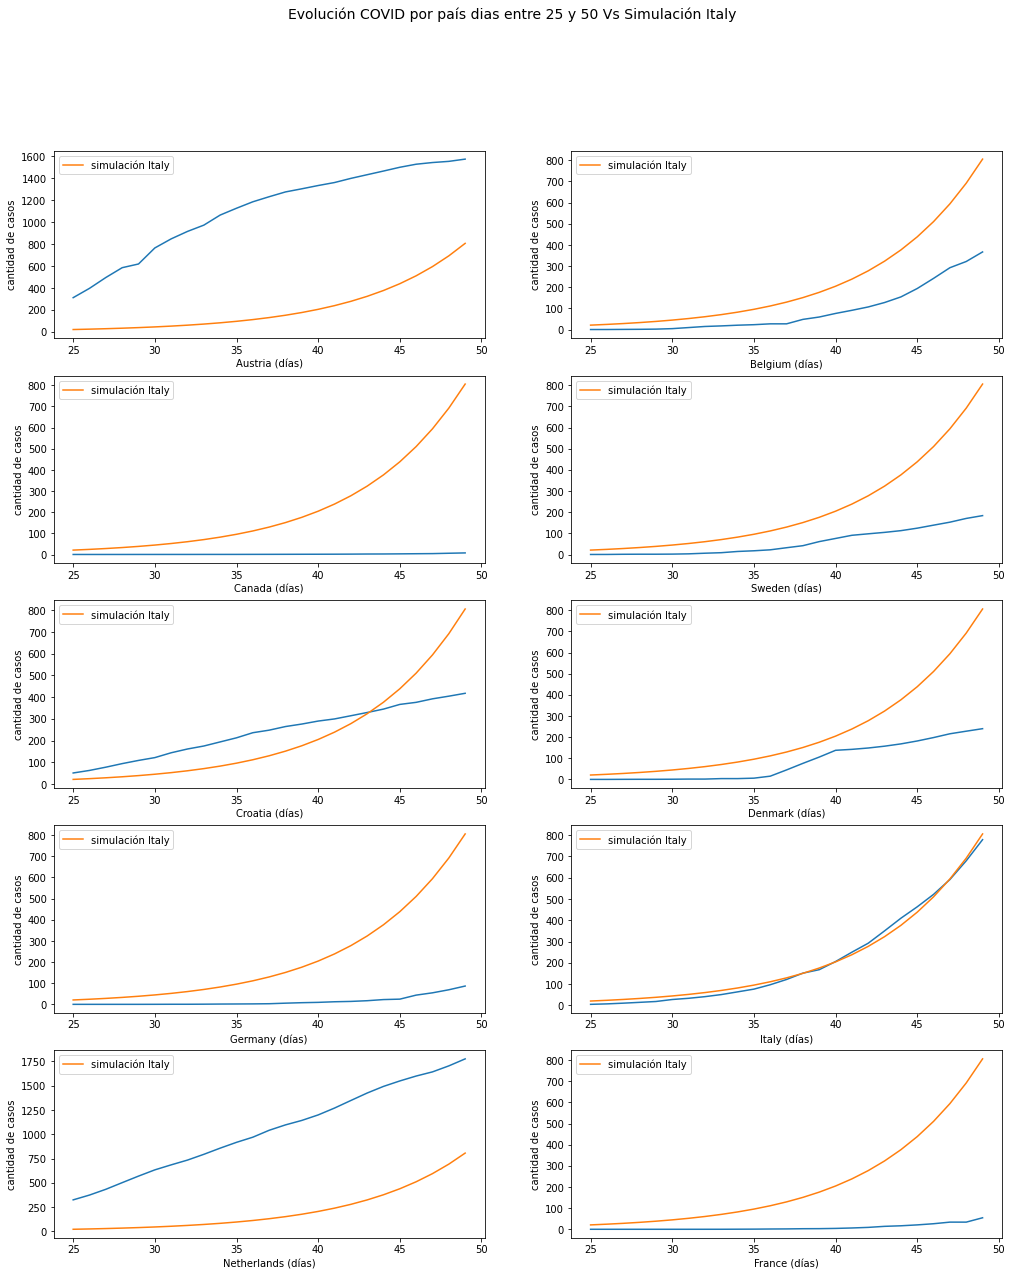

In [26]:
fig=plt.figure(figsize=(17,20))
for i in np.arange(0,10):
    plt.subplot(5,2,i+1)
    ind=np.where(paises==countries[i])
    ind=ind[0]
    casos=confirmados[ind]
    dias=np.arange(0,len(casos))

    casos_principio=casos[25:50]
    dias_principio=dias[25:50]
    plt.plot(dias_principio,casos_principio)
    fig.suptitle('Evolución COVID por país dias entre 25 y 50 Vs Simulación Italy', fontsize=14)
    plt.plot(dias_principio,casos_simu_1, label="simulación Italy")
    plt.xlabel(countries[i]+" (días)")
    plt.ylabel('cantidad de casos')
    plt.legend()

### Conclusion
Con estas ilustraciones podemos darnos cuenta que el coeficiente de crecimiento con el que Italia vivio los primeros contagios del Covid, nos son aplicables al resto de las poblaciones. Es realmente entendible, ya que las medidas que cada gobierno tomó al principio fueron todas muy diferentes (en terminos de cierres de fronteras, cuarentenas o medidas alternas para evitar el contagio), por lo que las curvas de contagio de todos los paises tienen un ritmo diferente

Ahora, como vimos que bajo un solo pais no podemos tener el comportamiento de crecimiento de cada uno de los paises, vamos a encontrar la tasa de crecimiento de cada uno para un periodo de tiempo definido.
este periodo de tiempo lo vamos a acotar desde el momento en que la curva de casos tuvo su primer sprint

In [27]:
#definimos el grupo de datos de 150 muestras de cada país de acuerdo al primero incrementos en su escala exponencial
austria=np.arange(150,351)
belgium=np.arange(150,351)
canada=np.arange(150,301)
sweden=np.arange(200,301)
croatia=np.arange(150,301)
denmark=np.arange(200,301)
germany=np.arange(150,301)
italy=np.arange(200,301)
netherland=np.arange(180,321)
france=np.arange(200,301)
world= np.arange(250,351)

In [28]:
casos_austria=datos_10['total_cases_per_million'][(datos_10.location == 'Austria')][150:351]
casos_belgium=datos_10['total_cases_per_million'][(datos_10.location == 'Belgium')][150:351]
casos_canada=datos_10['total_cases_per_million'][(datos_10.location == 'Canada')][150:301]
casos_sweden=datos_10['total_cases_per_million'][(datos_10.location == 'Sweden')][200:301]
casos_croatia=datos_10['total_cases_per_million'][(datos_10.location == 'Croatia')][150:301]
casos_denmark=datos_10['total_cases_per_million'][(datos_10.location == 'Denmark')][200:301]
casos_germany=datos_10['total_cases_per_million'][(datos_10.location == 'Germany')][150:301]
casos_italy=datos_10['total_cases_per_million'][(datos_10.location == 'Italy')][200:301]
casos_netherlands=datos_10['total_cases_per_million'][(datos_10.location == 'Netherlands')][180:321]
casos_france=datos_10['total_cases_per_million'][(datos_10.location == 'France')][200:301]
casos_world=datos_mundo['total_cases_per_million'][(datos_mundo.location == 'World')][250:351]

In [29]:
#corremos el ajuste

popt_1, pcov_1 = curve_fit(exponencial, austria, casos_austria, maxfev = 1500)
popt_2, pcov_2 = curve_fit(exponencial, belgium , casos_belgium, maxfev = 1500)
popt_3, pcov_3 = curve_fit(exponencial, canada, casos_canada, maxfev = 1000)
popt_4, pcov_4 = curve_fit(exponencial, sweden, casos_sweden, maxfev = 1500)
popt_5, pcov_5 = curve_fit(exponencial, croatia, casos_croatia, maxfev = 1500)
popt_6, pcov_6 = curve_fit(exponencial, denmark, casos_denmark, maxfev = 1500)
popt_7, pcov_7 = curve_fit(exponencial, germany, casos_germany, maxfev = 1500)
popt_8, pcov_8 = curve_fit(exponencial, italy, casos_italy, maxfev = 1500)
popt_9, pcov_9 = curve_fit(exponencial, netherland, casos_netherlands, maxfev = 1500)
popt_10, pcov_10 = curve_fit(exponencial, france, casos_france, maxfev = 1500)
popt_11, pcov_11 = curve_fit(exponencial, world , casos_world, maxfev = 1500)

k = [popt_1[0],popt_2[0],popt_3[0],popt_4[0],popt_5[0],popt_6[0],popt_7[0],popt_8[0],popt_9[0],popt_10[0]] # K optimos
k_world = popt_11[0]

In [30]:
k

[0.01313973674766219,
 0.012277394399158674,
 0.008416241384028347,
 0.012551816748455838,
 0.028437156453428408,
 0.01777501177049165,
 0.014149088276516187,
 0.026726069120538726,
 0.015976127603858678,
 0.025543646234424792]

In [ ]:
k_world

### Intervalos de confianza 

Como necesitamos determinar un intervalo de confianza para las constantes de crecimiento que hemos seleccionado en nuestra muestra de paises, vamos a realizar un remuestreo para homogenizar los datos y poder encontrar `mu` y `sigma`

In [31]:
def remuestreo(datos):
    remuestra=np.zeros(len(datos))
    i=0
    while i<len(datos):
        remuestra[i]=datos[np.random.randint(len(datos))]
        i=i+1
    return remuestra

(array([4., 1., 4., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.01227739, 0.01389337, 0.01550935, 0.01712532, 0.0187413 ,
        0.02035728, 0.02197325, 0.02358923, 0.0252052 , 0.02682118,
        0.02843716]),
 <BarContainer object of 10 artists>)

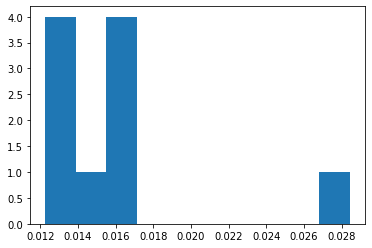

In [32]:
datos_rem=remuestreo(k)
plt.hist(datos_rem)

0.017138137172824284


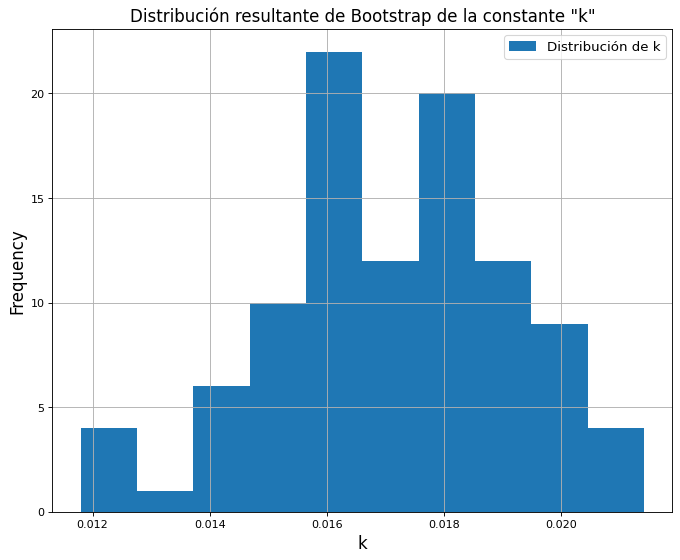

In [33]:
# ahora realicemos el Bootstrap:

np.random.seed(8)
nrep = 100
datos_k_10 = k # Tenemos las k de los 10 países
medias = []

for i in np.arange(nrep):
    datos_rem=remuestreo(datos_k_10)
    medias.append(np.mean(datos_rem))

mu_muestra= np.mean(medias)
sigma_muestra = np.std(medias)
print(np.mean(medias))

fig=plt.figure(figsize=(10,8),dpi=80)
plt.hist(medias, histtype = 'stepfilled',label = 'Distribución de k',bins=10)
plt.title('Distribución resultante de Bootstrap de la constante "k"', fontsize = 15)
plt.rc('axes', labelsize =10)
plt.rc('ytick', labelsize=15)
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('k', fontsize = 15)
plt.legend(fontsize = 12)
plt.grid()
plt.show()

In [34]:
z=1.96
n=len(medias)
int_conf=[mu_muestra-z*sigma_muestra/np.sqrt(n),mu_muestra+z*sigma_muestra/np.sqrt(n)]
print(int_conf)

[0.016750650679524165, 0.017525623666124403]


In [35]:
k_world

0.009853004486635857

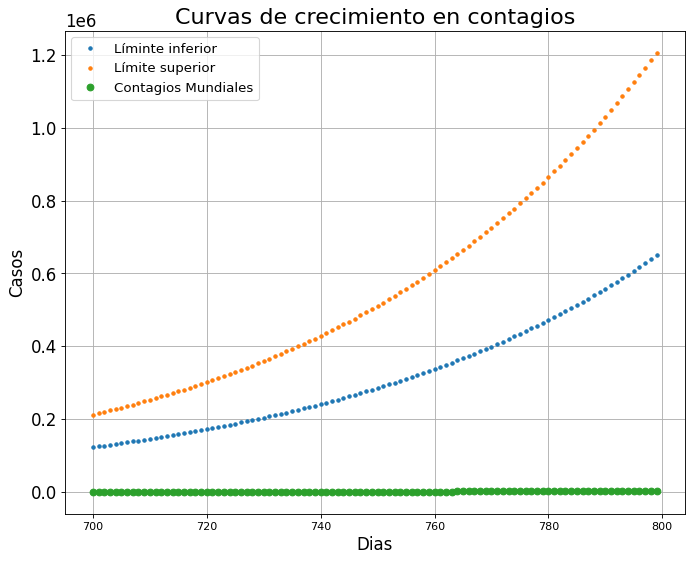

In [36]:
# Graficos de curvas:
k_min = int_conf[0]
k_max = int_conf[1]
k_mundo = k_world
dias_principio = np.arange(700,800)

casos_simu_min=exponencial(dias_principio,k_min,0)
casos_simu_max=exponencial(dias_principio,k_max,0)
casos_simu_world=exponencial(dias_principio,k_mundo,0)

fig=plt.figure(figsize=(10,8),dpi=80)
plt.plot(dias_principio,casos_simu_min,'.', label = 'Líminte inferior')
plt.plot(dias_principio,casos_simu_max,'.', label = 'Límite superior')
plt.plot(dias_principio,casos_simu_world,'o', label = 'Contagios Mundiales')
plt.title('Curvas de crecimiento en contagios',fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.xlabel('Dias',fontsize = 15)
plt.ylabel('Casos',fontsize = 15)
plt.legend(fontsize = 12)
plt.grid()
plt.show()


Como podemos ver en la grafica anterior, la grafica que muestra el comportamiento mundial en los dias que tenemos especificados no refleja el comportamiento de la muestra por la volatilidad de los datos en los paises seleccionados

C:\Users\JuanPabloEspinosaCas\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JuanPabloEspinosaCas\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JuanPabloEspinosaCas\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a

<AxesSubplot:ylabel='Density'>

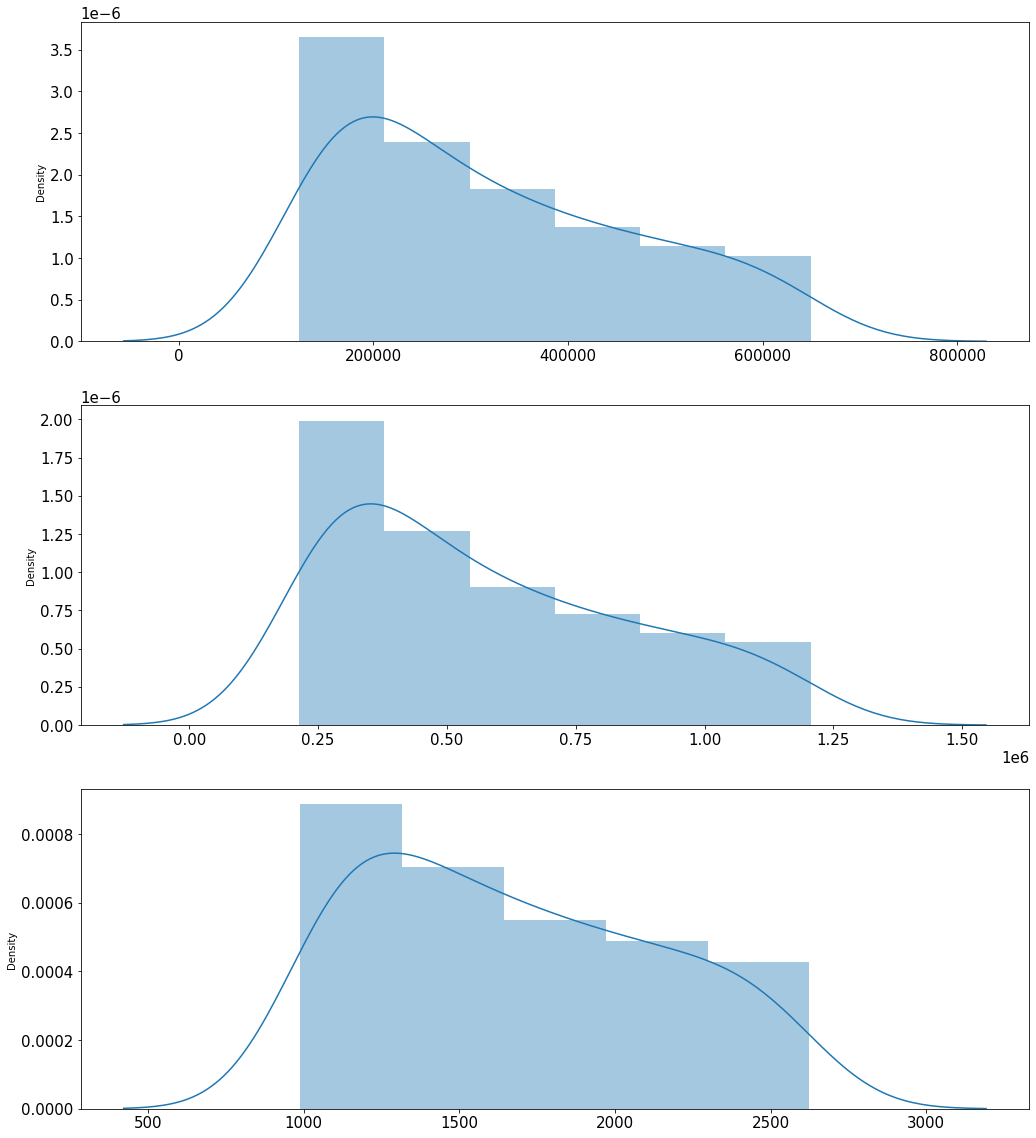

In [37]:
fig=plt.figure(figsize=(17,20))
plt.subplot(3,1,1)
sns.distplot(casos_simu_min)
plt.subplot(3,1,2)
sns.distplot(casos_simu_max)
plt.subplot(3,1,3)
sns.distplot(casos_simu_world)

## Evalución de estrategias

In [38]:
paises_unicos = datos.location.unique()
print(paises_unicos)

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European Union' 'Faeroe Islands' 'Falkland Islands'
 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana'

In [39]:
paises_0 = ['Brazil','Venezuela','India','Honduras','Sweden']
paises_1 = ['United Kingdom','Italy','China','Spain','Colombia']
all_paises = ['Brazil','Venezuela','India','Honduras','Sweden',
              'United Kingdom','Italy','China','Spain','Colombia']
cuarentena = [0,0,0,0,0,1,1,1,1,1]

se realiza un listado de paises que se acogieron a la medida segun la OMS y decisiones de politica publica de asumir la cuarentena como medida preventiva y te tratamiento antes los contagios generados por el COVID 19.
con esta seleccion de paises se seleccionan 3 indicadores a evaluar:
+ Total de contagios por millon
+ Total de muertes por millon
+ Indicador de muertes = muertes/contagios confirmados

adicionalmente se desarrollará un clasificador que se adopte mejor al comportamiento en la realidad

In [40]:
data_2= pd.read_csv(ruta +'owid-covid-data (world).csv', sep =',')

In [41]:
data_2=data_2[['location','total_cases_per_million','total_deaths_per_million']]

In [42]:
data_2['Ratio_death']=data_2['total_deaths_per_million']/data_2['total_cases_per_million']
filtro=data_2['location'].isin(['Brazil','Venezuela','India','Honduras','Sweden','Uruguay','United Kingdom','Italy','China','Spain','Colombia'])
data_mundo=data_2[filtro]

In [43]:
data_mundo.shape

(8402, 4)

In [44]:
data_mundo.isnull().sum()

location                      0
total_cases_per_million       0
total_deaths_per_million    245
Ratio_death                 245
dtype: int64

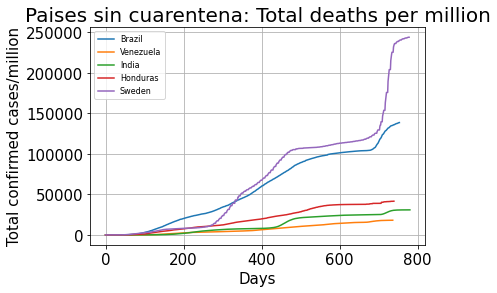

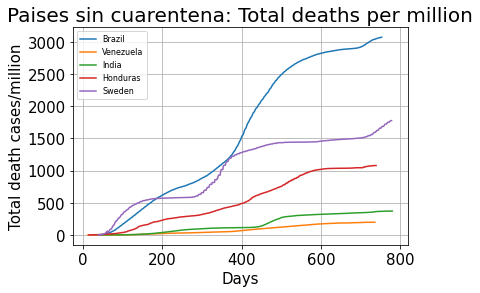

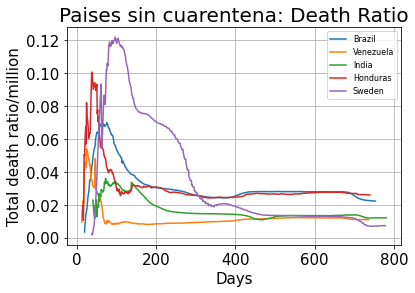

In [46]:

for pais in paises_0:
    casos_pais = data_mundo['total_cases_per_million'][(data_mundo.location == pais)]
    dias = np.arange(casos_pais.shape[0]) 
    plt.plot(dias,casos_pais,label = pais)
    i = i + 1


plt.title('Paises sin cuarentena: Total deaths per million', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 8)
plt.ylabel('Total confirmed cases/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.grid()
plt.show()

for pais in paises_0:
    casos_pais = data_mundo['total_deaths_per_million'][(data_mundo.location == pais)]
    dias = np.arange(casos_pais.shape[0]) 
    plt.plot(dias,casos_pais,label = pais)
    i = i + 1


plt.title('Paises sin cuarentena: Total deaths per million', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 8)
plt.ylabel('Total death cases/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.grid()
plt.show()

for pais in paises_0:
    casos_pais = data_mundo['Ratio_death'][(data_mundo.location == pais)]
    dias = np.arange(casos_pais.shape[0]) 
    plt.plot(dias,casos_pais,label = pais)
    i = i + 1

plt.title('Paises sin cuarentena: Death Ratio', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 8)
plt.ylabel('Total death ratio/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.grid()
plt.show()



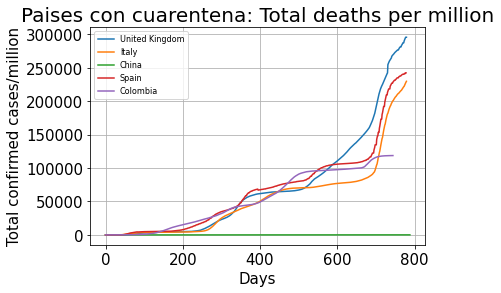

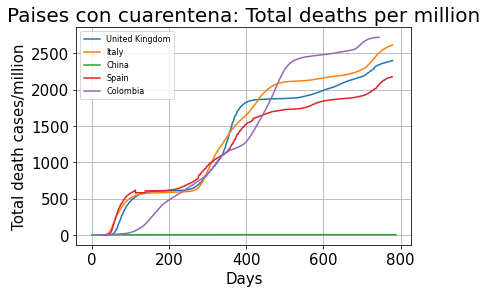

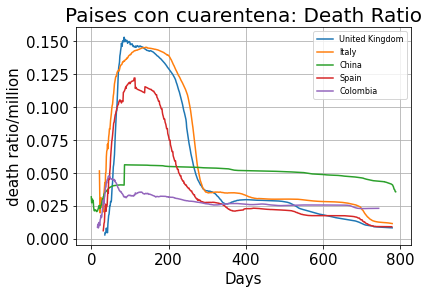

In [48]:

for pais in paises_1:
    casos_pais = data_mundo['total_cases_per_million'][(data_mundo.location == pais)]
    dias = np.arange(casos_pais.shape[0]) 
    plt.plot(dias,casos_pais,label = pais)
    i = i + 1


plt.title('Paises con cuarentena: Total deaths per million', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 8)
plt.ylabel('Total confirmed cases/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.grid()
plt.show()

for pais in paises_1:
    casos_pais = data_mundo['total_deaths_per_million'][(data_mundo.location == pais)]
    dias = np.arange(casos_pais.shape[0]) 
    plt.plot(dias,casos_pais,label = pais)
    i = i + 1


plt.title('Paises con cuarentena: Total deaths per million', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 8)
plt.ylabel('Total death cases/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.grid()
plt.show()

for pais in paises_1:
    casos_pais = data_mundo['Ratio_death'][(data_mundo.location == pais)]
    dias = np.arange(casos_pais.shape[0]) 
    plt.plot(dias,casos_pais,label = pais)
    i = i + 1

plt.title('Paises con cuarentena: Death Ratio', fontsize = 20)
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 8)
plt.ylabel('death ratio/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.grid()
plt.show()


En estas graficas podemos observar que para los paises que los paises que adoptaron la politica de realizar la cuarentena tuvieron una curva de contagio e incluso una ratio de muertes mas amplia que los paises que no la ralizaron. podría esto entenderse como la necesidad de la politica por la cultura de los paises en cuestion de vivencia y manejo de la sociedad.
Se destaca que el indicador de muerte en italia y en United Kingdom son las mas altas en ambas categorías en el primer año (primera ola importante del coronavirus), pero que al igual que los demas pasies y su decisiones de politica publica, pudieron ser aplacadas y bajar a los niveles de un 2.5% (que es un promedio general en las muestras seleccionadas)

In [49]:
dat = {'Pais': all_paises, 'confirmed': np.zeros(len(all_paises)), 'deaths': np.zeros(len(all_paises)), 'Ratio_death': np.zeros(len(all_paises)),'target': cuarentena}  
data_ml = pd.DataFrame(dat)
data_ml

,Pais,confirmed,deaths,Ratio_death,target
0,Brazil,0.0000,0.0000,0.0000,0
1,Venezuela,0.0000,0.0000,0.0000,0
2,India,0.0000,0.0000,0.0000,0
3,Honduras,0.0000,0.0000,0.0000,0
4,Sweden,0.0000,0.0000,0.0000,0
5,United Kingdom,0.0000,0.0000,0.0000,1
6,Italy,0.0000,0.0000,0.0000,1
7,China,0.0000,0.0000,0.0000,1
8,Spain,0.0000,0.0000,0.0000,1
9,Colombia,0.0000,0.0000,0.0000,1


creamos el data set con el que vamos a llenar de acuerdo a la muestra de 200 datos en las condiciones de cuarentena o no adoptadas por cada pais

In [50]:
paises = all_paises
i = 0
for pais in paises:
    casos_pais = data_mundo['total_cases_per_million'][(data_mundo.location == pais)][200:401]
    muertes_pais = data_mundo['total_deaths_per_million'][(data_mundo.location == pais)][200:401]
    ratio_muertes = np.mean(muertes_pais)/np.mean(casos_pais)
    dias = np.arange(200,401) 
    popt_casos , pcov_casos  = curve_fit(exponencial, dias, casos_pais, maxfev = 2000)       
    popt_muert , pcov_muert  = curve_fit(exponencial, dias, muertes_pais, maxfev = 2000)     
    # Inserto los datos al df que voy a usar para hacer el modelo:
    data_ml.loc[i,('confirmed')]=popt_casos[0]
    data_ml.loc[i,('deaths')]=popt_muert[0]
    data_ml.loc[i,('Ratio_death')]=ratio_muertes
    i = i + 1

In [51]:
data_ml = data_ml.sample(frac=1).reset_index(drop=True)
data_ml

,Pais,confirmed,deaths,Ratio_death,target
0,Venezuela,0.9903,0.9945,0.0093,0
1,Sweden,0.9948,0.9946,0.0264,0
2,India,0.9876,0.9905,0.0148,0
3,Honduras,0.9889,0.9945,0.0256,0
4,Italy,0.9897,0.9931,0.0415,1
5,Brazil,0.9877,0.9938,0.0260,0
6,United Kingdom,0.9871,0.9923,0.0357,1
7,Spain,0.9948,0.9936,0.0273,1
8,China,0.9947,0.9945,0.0535,1
9,Colombia,0.9899,0.9947,0.0270,1


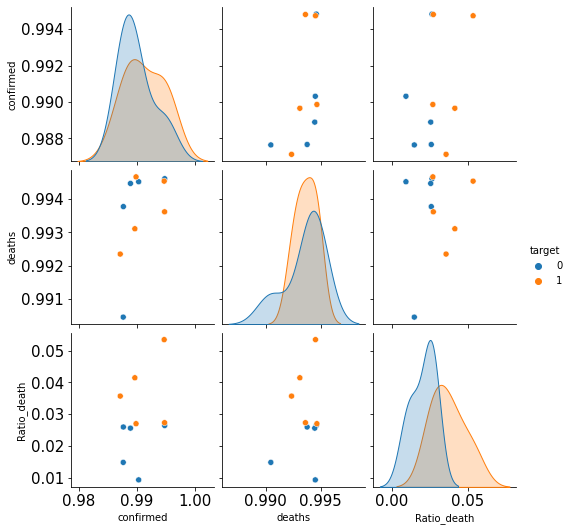

In [52]:
sns.pairplot(data=data_ml, hue="target")

ya teniendo el modelo con el cual hacer la clasificación, procedemos a realizarlo

In [53]:
X = data_ml[['deaths','confirmed','Ratio_death']]
y = data_ml[['target']] # Paises que hicieron cuarentena: 1, Paises que no hicieron cuarentena: 0.

## Separo en train y test:

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

## Naive Bayes:

nb = GaussianNB() # Benchmark para comparar contra Linear SVC y XGboost.
nb.fit(x_train,np.array(y_train).ravel())

## Regresion logistica:

logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\JuanPabloEspinosaCas\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [54]:
def confusion(ytest,y_pred):
    names=["0","1"]
    cm=confusion_matrix(ytest,y_pred,normalize='true')
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",ax=ax) #fmt=".0f",
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

Gauss


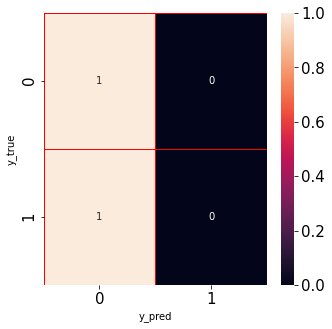

acc :  0.6666666666666666
F1 Score:  0.4
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

--------------------------------------------------------


C:\Users\JuanPabloEspinosaCas\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JuanPabloEspinosaCas\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JuanPabloEspinosaCas\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [55]:
print('Gauss')
y_pred_nb = nb.predict(x_test)
confusion(y_test,y_pred_nb)

print("acc : ",accuracy_score(y_test, y_pred_nb))
print("F1 Score: ", f1_score(y_test ,y_pred_nb, average='macro'))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred_nb))
print("--------------------------------------------------------")

teniendo en cuenta los resultados del clasificador, podemos ver que realmente es satisfactorio si ponemos como base que para que el modelo sea bueno almenos sea capaz de predecir un 60% de las clasificaciones de los paises que realizaron cuarentena o no.
para este caso, podemos observar que el nivel de precision es del 67%, en donde  es capaz de predecir en un 100% que el pais no hizo cuarentena cuando realmente no lo hizo  y no es capaz de predecir que el pais realizo la cuarentena cuando realmente lo hizo.

LogReg


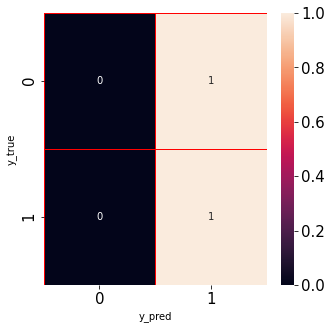

acc :  0.3333333333333333
F1 Score:  0.25
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



C:\Users\JuanPabloEspinosaCas\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JuanPabloEspinosaCas\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JuanPabloEspinosaCas\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [56]:
print('LogReg')
y_pred_logreg = logreg.predict(x_test)
confusion(y_test,y_pred_logreg)

print("acc : ",accuracy_score(y_test, y_pred_logreg))
print("F1 Score: ", f1_score(y_test ,y_pred_logreg, average='macro'))
print(classification_report(y_test, y_pred_logreg))

Para el modelo de regresion logistica, los resultados no son mas alentadores, ya que tambien tiene un porcentaje de precision del 34%.
Paradojicamente el modelo solamente esta siendo capaz de identificar en un 100% cuando el pais si hizo cuarentena efectivamente realizandolo, pero se equivoca siempre al decir que si lo hizo cuando realmente no lo realizó

#### Conclusión

Como vimos en los dos apartados de los modelos de clasificación, los resultados no fuero positivos a la hora de predecir cuales paises habian efectuado la cuarentena y cuales no, definiendo que para que fueran exitosos la precisión debía estar por encima del 60% y en ambos estuvieron apenas cercanos del 40%.
Esto se puede explicar por la dependencia que tienen las variables del modelo especificado con la variable target (casos, muertes y ratio de muertes) las cuales, tal como se evidencia en las distribuciones entre variables, tienen una importante dispersión e incluso no so nde clara separación entre las clases.

Para mejorar el resultado de los modelos podemos incluir mas variables con el fin de tener un poco mas de relacion entre las variables y el modelo pueda tener una precision mayor a la hora de entrenar y predecir lo variable target